# **Whole dataset clustering**

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from numpy import arange

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import sklearn.metrics as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
clustering = pd.read_csv('Data\whole_clustering.csv')
cluster = KMeans(n_clusters = 4)
cols = clustering.columns[:]
clustering.drop(clustering.columns[[0]], axis = 1, inplace = True)
clustering.head()

,index,Total W,Total L,Study,Margin,count_zeros
0,Subj_1,5800,-4650,Fridberg,1150,80
1,Subj_2,7250,-7925,Fridberg,-675,71
2,Subj_3,7100,-7850,Fridberg,-750,76
3,Subj_4,7000,-7525,Fridberg,-525,76
4,Subj_5,6450,-6350,Fridberg,100,76


So for my clustering analysis of the whole study I would like to see if the studies as a whole have interesting cluster patterns. To do this step I will have to map an integer value to the study so that clustering can take place.

In [4]:
y_predicted = cluster.fit_predict(clustering[["Margin","count_zeros"]])
clustering["cluster"] = y_predicted
clustering.head()

,index,Total W,Total L,Study,Margin,count_zeros,cluster
0,Subj_1,5800,-4650,Fridberg,1150,80,1
1,Subj_2,7250,-7925,Fridberg,-675,71,2
2,Subj_3,7100,-7850,Fridberg,-750,76,2
3,Subj_4,7000,-7525,Fridberg,-525,76,2
4,Subj_5,6450,-6350,Fridberg,100,76,1


No handles with labels found to put in legend.


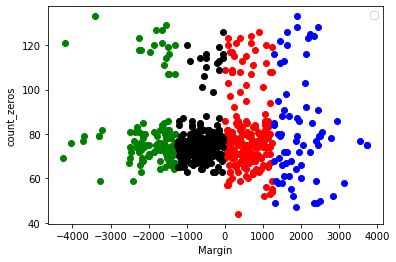

In [5]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Margin, df1.count_zeros, color='green')
plt.scatter(df2.Margin, df2.count_zeros, color='red')
plt.scatter(df3.Margin, df3.count_zeros, color='black')
plt.scatter(df4.Margin, df4.count_zeros, color='blue')

plt.xlabel("Margin")
plt.ylabel("count_zeros")
plt.legend()

In [7]:
clustering[['Margin','count_zeros']] = minmax_scale(clustering[['Margin','count_zeros']])
clustering.head()

,index,Total W,Total L,Study,Margin,count_zeros,cluster
0,Subj_1,5800,-4650,Fridberg,0.675000,0.404494,1
1,Subj_2,7250,-7925,Fridberg,0.446875,0.303371,2
2,Subj_3,7100,-7850,Fridberg,0.437500,0.359551,2
3,Subj_4,7000,-7525,Fridberg,0.465625,0.359551,2
4,Subj_5,6450,-6350,Fridberg,0.543750,0.359551,1


In [8]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(clustering[["Margin", "count_zeros"]])

In [9]:
clustering["cluster"] = y_predicted
clustering.head()

,index,Total W,Total L,Study,Margin,count_zeros,cluster
0,Subj_1,5800,-4650,Fridberg,0.675000,0.404494,0
1,Subj_2,7250,-7925,Fridberg,0.446875,0.303371,2
2,Subj_3,7100,-7850,Fridberg,0.437500,0.359551,2
3,Subj_4,7000,-7525,Fridberg,0.465625,0.359551,2
4,Subj_5,6450,-6350,Fridberg,0.543750,0.359551,2


In [10]:
km.cluster_centers_

array([[0.69183361, 0.31542525],
       [0.31934307, 0.33429017],
       [0.50055668, 0.34221899],
       [0.53452744, 0.79761579]])

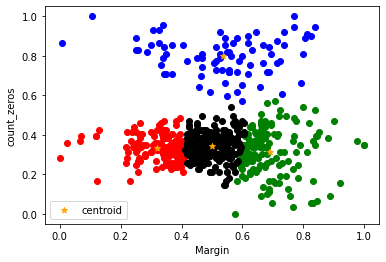

In [11]:
df1 = clustering[clustering.cluster==0]
df2 = clustering[clustering.cluster==1]
df3 = clustering[clustering.cluster==2]
df4 = clustering[clustering.cluster==3]

plt.scatter(df1.Margin, df1.count_zeros, color='green')
plt.scatter(df2.Margin, df2.count_zeros, color='red')
plt.scatter(df3.Margin, df3.count_zeros, color='black')
plt.scatter(df4.Margin, df4.count_zeros, color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="orange", marker="*", label="centroid")

plt.xlabel("Margin")
plt.ylabel("count_zeros")
plt.legend()

In [12]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(clustering[["Margin", "count_zeros"]])
    sse.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [13]:
sse

[34.96757367230577,
 19.517832061877886,
 11.632313671787802,
 9.484201338109294,
 7.899476917621609,
 6.360525635014802,
 5.568247840139838,
 4.944597331027517,
 4.377219325330844]

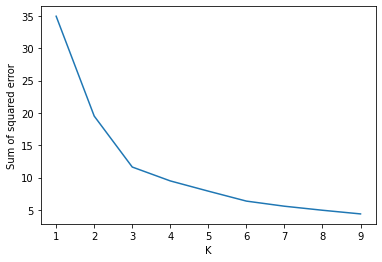

In [14]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)

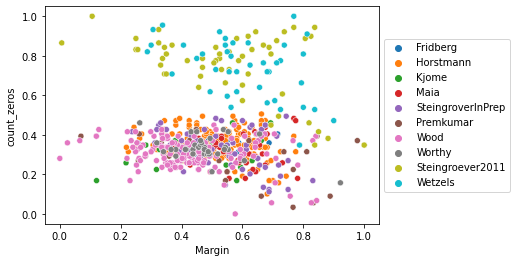

In [18]:
sns.scatterplot(data=clustering, x="Margin", y="count_zeros", hue="Study")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))